In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [66]:
ne_phi = np.array([
    2940,
    2920,
    2852,
    2838,
    2813,
    2792,
    2780,
    2742,
    2734,
    2714,
    2702,
    2688,
    2668,
    2646,
    2636,
    2620,
    2607,
    2589,
    2564,
    2547,
    2519,
    2501,
    2238,
    2204,
    2196,
])

ne_lambda = np.array([
    7032,
    6929,
    6717,
    6678,
    6599,
    6533,
    6507,
    6402,
    6383,
    6334,
    6305,
    6267,
    6217,
    6164,
    6143,
    6096,
    6074,
    6030,
    5976,
    5945,
    5882,
    5852,
    5401,
    5341,
    5331
])

hg_phi = np.array([
    2914,
    2678,
    2471,
    2460,
    2284,
    1859,
    1198,
    644,
])

hg_lambda = np.array([
    6907,
    6234,
    5791,
    5770,
    5461,
    4916,
    4358,
    4047
])

h1_phi = np.array([
    2444,
    1455,
    812
]) + 360

h2_phi = np.array([
    2804,
    1824,
    1187,
    773
])

_____
Подгон (предсказываем по данным h2_phi с чужой устнановки четвёртое значение в h1_phi - на нашей установке)

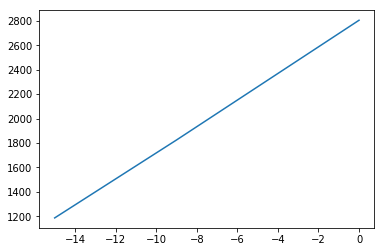

In [67]:
plt.plot(h1_phi - h2_phi[:3], h2_phi[:3]) 
plt.show()  

Типа линия, типа прямая

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
LR = LinearRegression() 
LR.fit(h2_phi[:3].reshape(3, 1), (h1_phi - h2_phi[:3]).reshape(3, 1))
h1_phi_4_predicted_delta = LR.predict([[h2_phi[3]]])
h1_phi_4_predicted = h2_phi[3] + h1_phi_4_predicted_delta
h1_phi_4_predicted  # приблизили разность оптимальной кривой, спрогнозировали

array([[754.19898575]])

In [70]:
h1_phi_new = np.array(list(h1_phi) + [h1_phi_4_predicted])
h1_phi_new

array([2804.        , 1815.        , 1172.        ,  754.19898575])

________________________

In [45]:
len(ne_phi), len(ne_lambda)

(25, 25)

In [71]:
len(hg_phi), len(hg_lambda)

(8, 8)

In [72]:
X = np.hstack([ne_phi, hg_phi])
y = np.hstack([ne_lambda, hg_lambda])
f = interp1d(X, y, kind='quadratic')

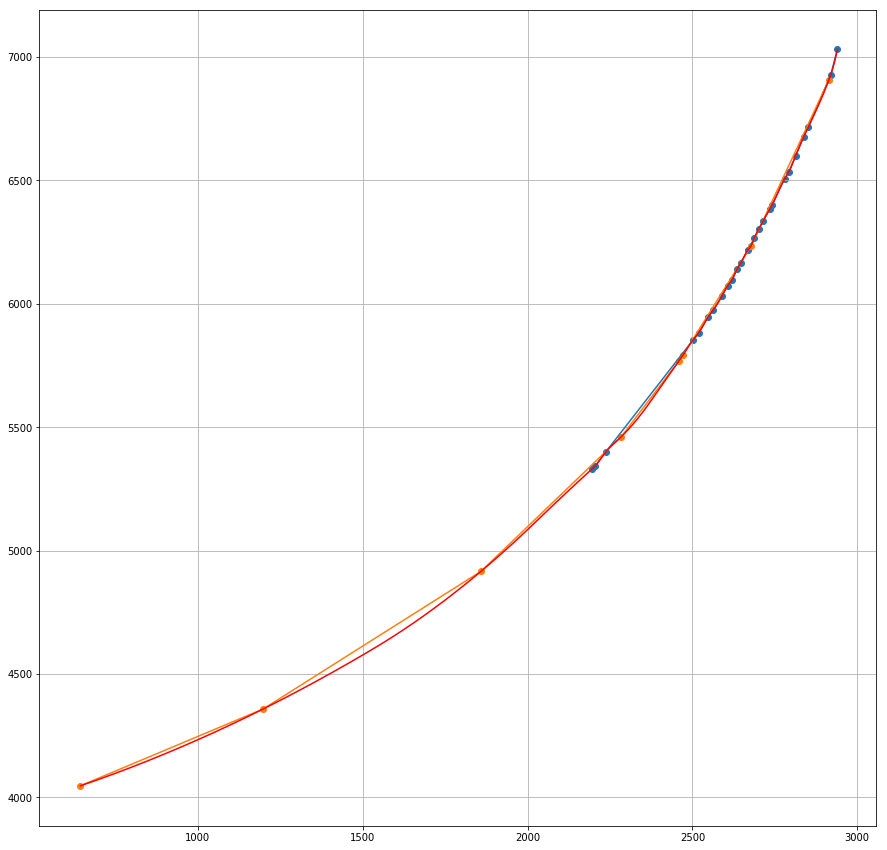

In [73]:
plt.figure(figsize=(15, 15))
plt.plot(ne_phi, ne_lambda)
plt.scatter(ne_phi, ne_lambda)

plt.plot(hg_phi, hg_lambda)
plt.scatter(hg_phi, hg_lambda)

#plt.plot(h1_phi, h1_lambda)
#plt.scatter(h1_phi, h1_lambda)

grid = np.linspace(X.min(), X.max(), 1000)
plt.plot(grid, f(grid), color="red")

plt.grid()
plt.show()

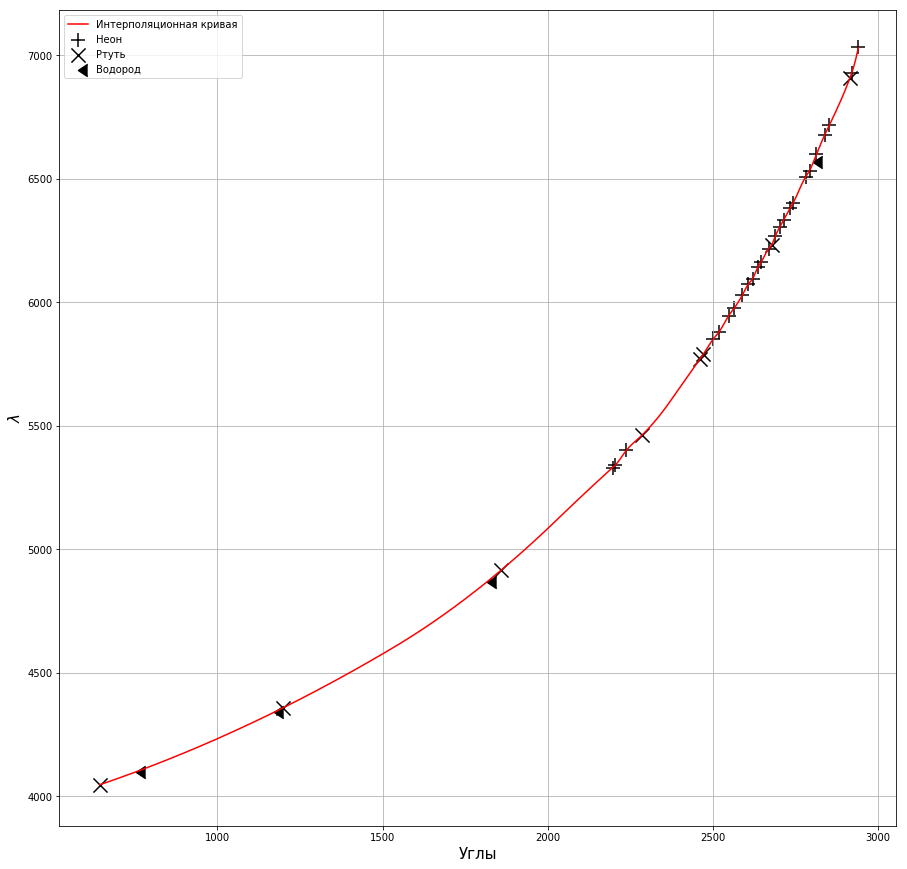

In [105]:
plt.figure(figsize=(15, 15))
plt.scatter(ne_phi, ne_lambda, marker="+", s=200, label="Неон", color="black")
plt.scatter(hg_phi, hg_lambda, marker="x", s=200, label="Ртуть", color="black")
plt.scatter(h1_phi_new, f(h1_phi_new), marker=4, s=150, label="Водород", color="black")

grid = np.linspace(X.min(), X.max(), 1000)
plt.plot(grid, f(grid), color="red", label="Интерполяционная кривая")
plt.xlabel("Углы", fontsize=15)
plt.ylabel("$\lambda$", fontsize=15)
plt.legend()
plt.grid()
plt.show()

In [106]:
h_lambda_predicted = f(h1_phi_new)
h_lambda_predicted

array([6568.90775437, 4867.48293157, 4340.79209117, 4099.55641888])

<img src="http://mypresentation.ru/documents/637d3b7041847466abfc8a4779050bdc/img17.jpg">

$$\frac{1}{\lambda} = R Z^2 (\frac{1}{n^2} - \frac{1}{m^2})$$

$$R = \frac{(nm)^2}{\lambda Z^2 (m^2 - n^2)}$$

In [112]:
n=  2
R = np.array([((n*m)**2) / (h_lambda_predicted[m-3] * (m*m - n*n))for m in range(3, 7)])

In [113]:
R  # теория: R = 109 677,6 см ^ (-1)

array([0.00109607, 0.00109571, 0.00109701, 0.00109768])

In [116]:
R.mean()  # длины волн были в ангстремах -> нужно умножить на 10^10

10966179.651822703

In [118]:
R.mean() * 10 ** 10  # это в м ^ (-1)

10966179.651822703

In [124]:
R_predicted = R.mean() * 10 ** 8  # это в cм ^ (-1)
R_predicted

109661.79651822703

In [125]:
R_theory = 109677.6
(R_theory - R_predicted) / R_predicted

0.0001441110967970677